In [1]:
import pandas as pd
df = pd.read_csv('Pregnancy Risk.csv')
df.sample(5)

,Unnamed: 0,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
150,150,25,4.1,57.4,25.56,No,Normal,100.0,70.0,Modarate,Normal,No,No,No,NaN,NaN
155,155,18,5.0,48.5,20.88,No,No_delivary,100.0,60.0,Normal,Normal,No,No,Yes,NaN,NaN
118,118,26,5.0,60.0,25.83,No,No_delivary,130.0,70.0,Normal,Normal,No,No,No,NaN,NaN
164,164,22,5.0,59.0,25.40,No,Normal,120.0,80.0,Normal,Normal,No,No,No,NaN,NaN
242,242,35,5.2,55.5,22.38,No,Normal,90.0,60.0,Normal,Normal,No,No,Yes,NaN,NaN


In [2]:
df.shape

(201, 14)

In [3]:
df1 = df.drop(['Unnamed: 0'],axis=1)
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk
0,25,5.3,50.7,19.80,No,No_delivary,110,90,Normal,Normal,No,No,No
1,30,5.0,86.3,37.16,No,Normal,110,80,Normal,Normal,No,No,No
2,26,5.1,58.8,24.49,No,Normal,120,80,Normal,Normal,No,No,No
3,26,5.1,86.8,36.16,No,Normal,120,80,Normal,Normal,No,Yes,Yes
4,36,4.8,85.8,42.90,No,Normal,110,80,Normal,Normal,No,No,Yes


<AxesSubplot:>

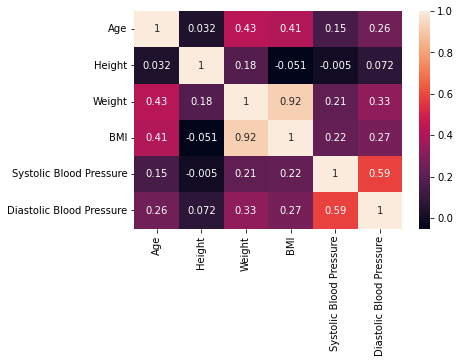

In [4]:
import seaborn as sns
sns.heatmap(df1.corr(),annot=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['Blood Group ( is Negative?)','Jaundice','Diabetes','Risk']
for x in col:
    df1[x] = encoder.fit_transform(df[x])
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk
0,25,5.3,50.7,19.80,0,No_delivary,110,90,Normal,Normal,0,0,0
1,30,5.0,86.3,37.16,0,Normal,110,80,Normal,Normal,0,0,0
2,26,5.1,58.8,24.49,0,Normal,120,80,Normal,Normal,0,0,0
3,26,5.1,86.8,36.16,0,Normal,120,80,Normal,Normal,0,1,1
4,36,4.8,85.8,42.90,0,Normal,110,80,Normal,Normal,0,0,1


In [6]:
df1.describe()

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Systolic Blood Pressure,Diastolic Blood Pressure,Jaundice,Diabetes,Risk
count,201.000000,201.000000,201.000000,201.000000,201.0,201.000000,201.000000,201.000000,201.000000,201.000000
mean,25.203980,4.879602,56.905473,24.649453,0.0,111.890547,75.398010,0.029851,0.039801,0.447761
std,6.014415,0.394502,11.181266,4.672962,0.0,12.037772,9.129118,0.170600,0.195979,0.498505
min,18.000000,4.100000,36.300000,14.140000,0.0,80.000000,60.000000,0.000000,0.000000,0.000000
25%,20.000000,4.800000,48.000000,21.010000,0.0,100.000000,70.000000,0.000000,0.000000,0.000000
50%,25.000000,5.000000,56.300000,24.080000,0.0,110.000000,80.000000,0.000000,0.000000,0.000000
75%,28.000000,5.100000,64.000000,27.080000,0.0,120.000000,80.000000,0.000000,0.000000,1.000000
max,60.000000,5.900000,98.000000,42.900000,0.0,150.000000,110.000000,1.000000,1.000000,1.000000


In [7]:
df2 = pd.get_dummies(df1,drop_first=True)
df2.sample(2)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Systolic Blood Pressure,Diastolic Blood Pressure,Jaundice,Diabetes,Risk,Delivery Type_No_delivary,Delivery Type_Normal,Edema_Modarate,Edema_Normal,Anemia_Modarate,Anemia_Normal
68,32,5.0,54.7,23.55,0,110,70,0,0,0,0,1,0,1,0,1
79,27,4.1,70.8,31.53,0,110,70,0,0,0,0,1,0,1,0,1


In [8]:
from sklearn.model_selection import train_test_split
x = df2.drop(['Risk'],axis=1)
x[:1]

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Systolic Blood Pressure,Diastolic Blood Pressure,Jaundice,Diabetes,Delivery Type_No_delivary,Delivery Type_Normal,Edema_Modarate,Edema_Normal,Anemia_Modarate,Anemia_Normal
0,25,5.3,50.7,19.8,0,110,90,0,0,1,0,0,1,0,1


In [9]:
y = df2.Risk
y[:1]

0    0
Name: Risk, dtype: int32

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [11]:
len(y_train)

160

In [13]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

In [14]:
clf.fit(x_train,y_train)

SVC(gamma='auto')

In [15]:
clf.score(x_train,y_train)

0.94375

In [16]:
clf.score(x_test,y_test)

0.6585365853658537

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        28
           1       0.44      0.31      0.36        13

    accuracy                           0.66        41
   macro avg       0.58      0.56      0.57        41
weighted avg       0.63      0.66      0.64        41



In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

In [19]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [20]:
model.score(x_train,y_train)

0.96875

In [21]:
model.score(x_test,y_test)

0.8780487804878049

In [22]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.83      0.77      0.80        13

    accuracy                           0.88        41
   macro avg       0.86      0.85      0.86        41
weighted avg       0.88      0.88      0.88        41

